In [1]:
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch import nn, optim
import matplotlib.pyplot as plt

In [2]:
# creating the dataset
X, y = make_circles(1000, noise=0.03, random_state=34)
len(X), len(y)

(1000, 1000)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

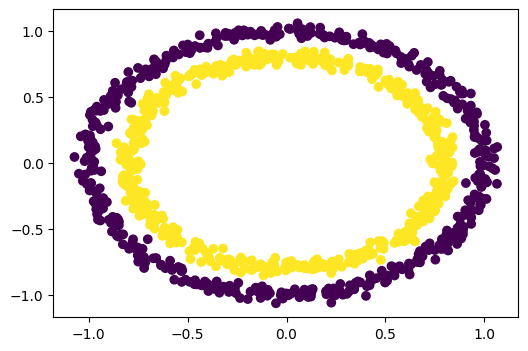

In [5]:
# visualizing the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:, 1], c=y)

In [6]:
# Turning the data into tensors
X = torch.from_numpy(X).type(torch.float).to(device=device)
y = torch.from_numpy(y).type(torch.float).to(device=device)

In [114]:
class ClassifierModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layers = nn.Sequential(
            nn.Linear(2,5),
            nn.ReLU(),
            nn.Linear(5,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        # the below line states that the passing of x is from layer 1 -> layer 2
        # return torch.round(torch.sigmoid(self.layers(X)))
        return self.layers(x)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [116]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [117]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

In [118]:
def Accuracy(y_pred, y_actual):
    # y = torch.round(torch.sigmoid(y_pred))
    y = torch.round(y_pred)
    correct = torch.eq(y, y_actual).sum().item()
    return (correct/len(y_actual))*100

In [119]:
model = ClassifierModel().to(device)
print(model)

ClassifierModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [120]:
# Creating the training loop
def train_model(mod, epochs = 1000):
    mod = mod.to(device)
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(params = mod.parameters(), lr = 0.6)

    for epoch in range(epochs):
        mod.train()
        y_pred = mod(X_train).squeeze()

        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        mod.eval()
        with torch.inference_mode():
            test_preds = mod(X_test).squeeze()
            test_loss = loss_fn(test_preds, y_test.squeeze())
            test_accuracy = Accuracy(test_preds, y_test)
        if epoch % 20 == 0:
            print(f"For epoch {epoch} \t| Loss: {loss} \t| Test Loss: {test_loss} \t| Accuracy : {Accuracy(y_pred, y_train):.5f} \t| Test Accuracy : {test_accuracy:.5f}")
            # print("Accuracy is: ", Accuracy(y_pred, y_train))
            print("-"*100)

In [121]:
train_model(model)

For epoch 0 	| Loss: 0.7008419632911682 	| Test Loss: 0.779501736164093 	| Accuracy : 43.50000 	| Test Accuracy : 53.00000
----------------------------------------------------------------------------------------------------
For epoch 20 	| Loss: 0.6273913979530334 	| Test Loss: 0.613594651222229 	| Accuracy : 62.87500 	| Test Accuracy : 64.50000
----------------------------------------------------------------------------------------------------
For epoch 40 	| Loss: 0.4978925883769989 	| Test Loss: 0.5013390183448792 	| Accuracy : 73.37500 	| Test Accuracy : 73.50000
----------------------------------------------------------------------------------------------------
For epoch 60 	| Loss: 0.47658124566078186 	| Test Loss: 0.49510541558265686 	| Accuracy : 76.00000 	| Test Accuracy : 75.00000
----------------------------------------------------------------------------------------------------
For epoch 80 	| Loss: 0.4796468913555145 	| Test Loss: 0.49005934596061707 	| Accuracy : 76.00000

In [93]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [20]:
from helper_functions import plot_decision_boundary

In [127]:
# Plot decision boundaries for training and test sets
def plot_model_classification(mod):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(mod, X_train, y_train)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(mod, X_test, y_test)

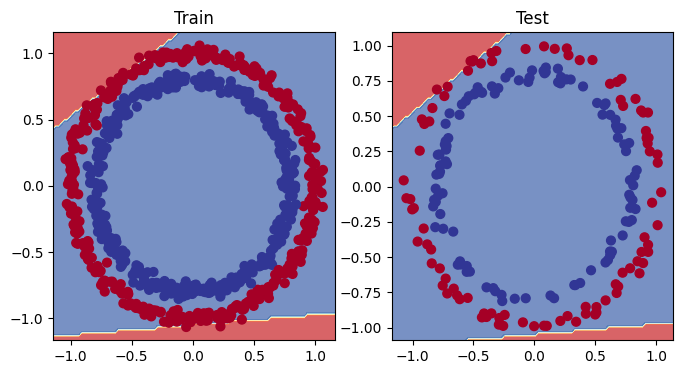

In [128]:
plot_model_classification(model)

In [135]:
class ClassifierModel2(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layers = nn.Sequential(
            nn.Linear(2,30),
            nn.LeakyReLU(),
            nn.Linear(30,10),
            nn.LeakyReLU(),
            nn.Linear(10,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        # the below line states that the passing of x is from layer 1 -> layer 2
        # return torch.round(torch.sigmoid(self.layers(X)))
        return self.layers(x)

In [136]:
model2 = ClassifierModel2()
model2

ClassifierModel2(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [138]:
train_model(model2, 2000)

For epoch 0 	| Loss: 3.484220314931008e-06 	| Test Loss: 17.029367446899414 	| Accuracy : 100.00000 	| Test Accuracy : 70.00000
----------------------------------------------------------------------------------------------------
For epoch 20 	| Loss: 0.03900756686925888 	| Test Loss: 0.014182774350047112 	| Accuracy : 99.00000 	| Test Accuracy : 99.50000
----------------------------------------------------------------------------------------------------
For epoch 40 	| Loss: 0.0010171016911044717 	| Test Loss: 0.007507352624088526 	| Accuracy : 100.00000 	| Test Accuracy : 99.50000
----------------------------------------------------------------------------------------------------
For epoch 60 	| Loss: 0.0002870218304451555 	| Test Loss: 0.00041453540325164795 	| Accuracy : 100.00000 	| Test Accuracy : 100.00000
----------------------------------------------------------------------------------------------------
For epoch 80 	| Loss: 0.00014320792979560792 	| Test Loss: 0.00017193917301

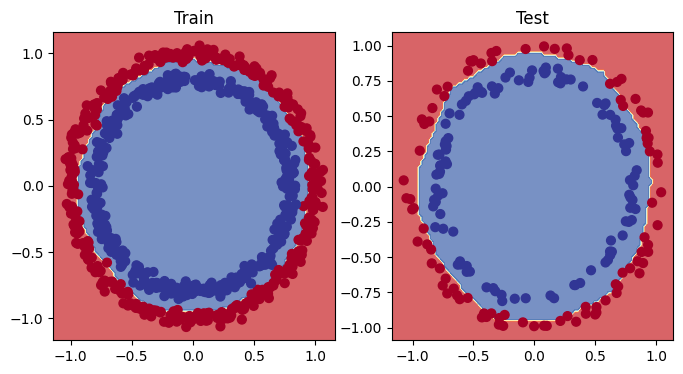

In [143]:
# start watching from 10:49

plot_model_classification(model2)

In [139]:
torch.save(model2, "classification_model.h")

In [140]:
a = torch.load("classification_model.h")

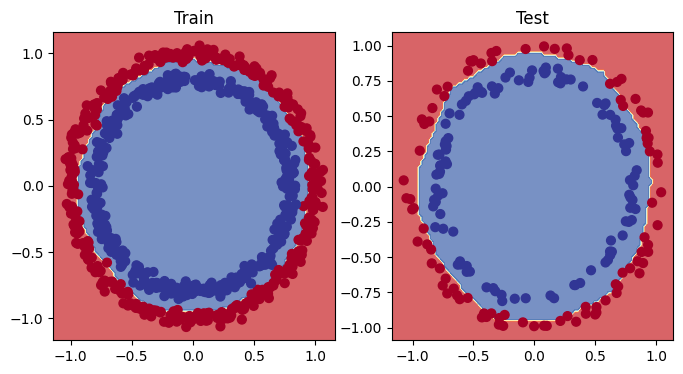

In [142]:
plot_model_classification(a)

In [ ]:
# strart from 12:42